# Exploring wind direction and magnitude between ERA5 and MetOffice using windrose visualizations

Summary:
    
Past:
- The westerly winds are the most dominant feature of the SO wind climatology, persisting in both summer and winter, though they are less prominent in summer than winter
- The MetOffice data product does an ok job of reproducing dominant ERA5 patterns, though the western dominance is slightly less prominent in the MO data product than the ERA5 one
- looking into the past (1950-2020), under the Ozone1950 (2A) scenario, the winds are notably weaker, which is what we would expect. The big differences are expected later on in the future, though. 


Future: 
- the main differences between the 6 scenarios are most dramatic in the summer, as we would expect

    code adapted from Ben Moore-Maley at UBC-MOAD:
    https://github.com/UBC-MOAD/PythonNotes/blob/master/windrecipes.ipynb

In [33]:
pdir = '/gpfs/home/mep22dku/scratch/SOZONE/PICTURES/CELOS2022/'

In [34]:
import windrose
import numpy as np
import cmocean as cm
from windrose import WindroseAxes
import netCDF4 as nc
from windrose import WindroseAxes
from matplotlib import pyplot as plt
#import matplotlib.cm as cm
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import xarray as xr

In [35]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')


In [36]:
def wspd_from_u_v(u,v):
    
    wspd = np.sqrt(u**2 + v**2)
    # Calculate wind direction
    wdir = 180 * np.arctan2(v, u) / np.pi
    wdir[wdir < 0] = wdir[wdir < 0] + 360
    angle = 270 - wdir
    angle[angle < 0] = angle[angle < 0] + 360
    
    return angle, wspd 

def simple_windrose(angle, wspd, title, fact =1):
    fig = plt.figure(figsize=(6*fact, 6*fact))
    ax = WindroseAxes.from_ax(fig=fig)
    ax.set_position([0.15, 0.15, 0.8, 0.8])
    ax.bar(angle, wspd, bins=range(0, 11, 2), nsector=16, normed=True, opening=0.8, edgecolor='k', cmap=cm.cm.thermal)
    #ax.contourf(wd, ws, bins=np.arange(0, 8, 1), cmap=cm.cm.thermal)
    # Formatting
    ax.set_ylim([0, 20])
    ax.yaxis.set_ticks([5, 10, 15, 20])
    ax.yaxis.set_ticklabels('')
    ax.xaxis.set_ticklabels('')
    ax.xaxis.set_ticklabels(['E', 'NE', 'N', 'NW', 'W', 'SW', 'S', 'SE'])
    ax.yaxis.set_ticklabels([f'{tick}%' for tick in [5, 10, 15, 20]])
    ax.set_title(title)
    handles = ax.get_children()[:6]
    # Add legend
    labels = ['0-2', '2-4', '4-6', '6-8', '8-10', '> 10']
    fig.legend(frameon=False, handles=handles, labels=labels, bbox_to_anchor=(1.05, 0.45), title='m/s')
    
def three_roses(angles, wspds, titles, stit, fact = 1):
### 
    fig = plt.figure(figsize=(18*fact, 6*fact))

# Loop through obs/HRDPS
    for wspd, angle, title, xpos in zip(wspds, angles, titles, [0, 0.33, 0.66]):

        # Make windrose object
        ax = WindroseAxes.from_ax(fig=fig)
        ax.set_position([xpos, 0.15, 0.4, 0.8])
        # Plot windrose
        ax.bar(angle, wspd, bins=range(0, 11, 2), nsector=16, normed=True, opening=0.8, edgecolor='k', cmap=cm.cm.thermal)
        #ax.contourf(wd, ws, bins=np.arange(0, 8, 1), cmap=cm.cm.thermal)
        # Formatting
        ax.set_ylim([0, 52])
        ax.yaxis.set_ticks([10, 20,30,40,50])
        ax.yaxis.set_ticklabels('')
        ax.xaxis.set_ticklabels('')
        ax.xaxis.set_ticklabels(['E', 'NE', 'N', 'NW', 'W', 'SW', 'S', 'SE'])
        ax.yaxis.set_ticklabels([f'{tick}%' for tick in [10, 20,30,40,50]], fontsize = 10)
        ax.set_title(title, fontsize = 12)

        # Manually get legend handles (since WindroseAxes.bar returns None)
        handles = ax.get_children()[:6]

    # Add legend
    labels = ['0-2', '2-4', '4-6', '6-8', '8-10', '> 10']
    plt.suptitle(stit, fontsize = 14, y = 1.15)
    fig.legend(frameon=False, handles=handles, labels=labels, bbox_to_anchor=(1.05, 0.45), title='m/s', fontsize = 12)

def two_roses(angles, wspds, titles, stit, savet, fact = 1):
### 
    fig = plt.figure(figsize=(12*fact, 6*fact))

# Loop through obs/HRDPS
    for wspd, angle, title, xpos in zip(wspds, angles, titles, [0, 0.5]):

        # Make windrose object
        ax = WindroseAxes.from_ax(fig=fig)
        ax.set_position([xpos, 0.15, 0.4, 0.8])
        # Plot windrose
        ax.bar(angle, wspd, bins=range(0, 11, 2), nsector=16, normed=True, opening=0.8, edgecolor='k', cmap=cm.cm.thermal)
        #ax.contourf(wd, ws, bins=np.arange(0, 8, 1), cmap=cm.cm.thermal)
        # Formatting
        ax.set_ylim([0, 52])
        ax.yaxis.set_ticks([10, 20,30,40,50])
        ax.yaxis.set_ticklabels('')
        ax.xaxis.set_ticklabels('')
        ax.xaxis.set_ticklabels(['E', 'NE', 'N', 'NW', 'W', 'SW', 'S', 'SE'])
        ax.yaxis.set_ticklabels([f'{tick}%' for tick in [10, 20,30,40,50]], fontsize = 10)
        ax.set_title(title, fontsize = 12)

        # Manually get legend handles (since WindroseAxes.bar returns None)
        handles = ax.get_children()[:6]

    # Add legend
    labels = ['0-2', '2-4', '4-6', '6-8', '8-10', '> 10']
    plt.suptitle(stit, fontsize = 14, y = 1.15)
    fig.legend(frameon=False, handles=handles, labels=labels, bbox_to_anchor=(1.05, 0.45), title='m/s', fontsize = 12)
    fig.savefig(f'{pdir}/{savet}_windrose.jpg', dpi = 200)


# 

In [37]:
scen_1A = nc.Dataset('./EXTRACT/ncs/scen_1A_monthly_u_v_vel.nc')
scen_1A['yr'][70]

masked_array(data=2010,
             mask=False,
       fill_value=999999)

In [38]:
tmesh = nc.Dataset('/gpfs/data/greenocean/software/resources/regrid/mesh_mask3_6.nc')
tmask = (tmesh['tmask'][0,0,0:39,:])

scen_1A = nc.Dataset('./EXTRACT/ncs/scen_1A_monthly_u_v_vel.nc')
u_vel_fy = np.nanmean(scen_1A['mean_uvel'][10:20,14,0:39,:], axis = 0)
v_vel_fy = np.nanmean(scen_1A['mean_vvel'][10:20,14,0:39,:], axis = 0)
u_vel_fy = u_vel_fy[tmask == 1]; u_vel_fy = np.ravel(u_vel_fy)
v_vel_fy = v_vel_fy[tmask == 1]; v_vel_fy = np.ravel(v_vel_fy)
u_vel_wi = np.nanmean(scen_1A['mean_uvel'][10:20,13,0:39,:], axis = 0)
v_vel_wi = np.nanmean(scen_1A['mean_vvel'][10:20,13,0:39,:], axis = 0)
u_vel_wi = u_vel_wi[tmask == 1]; u_vel_wi = np.ravel(u_vel_wi)
v_vel_wi = v_vel_wi[tmask == 1]; v_vel_wi = np.ravel(v_vel_wi)
u_vel_su = np.nanmean(scen_1A['mean_uvel'][10:20,12,0:39,:], axis = 0)
v_vel_su = np.nanmean(scen_1A['mean_vvel'][10:20,12,0:39,:], axis = 0)
u_vel_su = u_vel_su[tmask == 1]; u_vel_su = np.ravel(u_vel_su)
v_vel_su = v_vel_su[tmask == 1]; v_vel_su = np.ravel(v_vel_su)

scen_1A_1950_angle_fy, scen_1A_1950_wspd_fy = wspd_from_u_v(u_vel_fy,v_vel_fy)
scen_1A_1950_angle_wi, scen_1A_1950_wspd_wi = wspd_from_u_v(u_vel_wi,v_vel_wi)
scen_1A_1950_angle_su, scen_1A_1950_wspd_su = wspd_from_u_v(u_vel_su,v_vel_su)

tmesh = nc.Dataset('/gpfs/data/greenocean/software/resources/regrid/mesh_mask3_6.nc')
tmask = (tmesh['tmask'][0,0,0:39,:])
####
scen_1A = nc.Dataset('./EXTRACT/ncs/scen_1A_monthly_u_v_vel.nc')
u_vel_fy = np.nanmean(scen_1A['mean_uvel'][70:80,14,0:39,:], axis = 0)
v_vel_fy = np.nanmean(scen_1A['mean_vvel'][70:80,14,0:39,:], axis = 0)
u_vel_fy = u_vel_fy[tmask == 1]; u_vel_fy = np.ravel(u_vel_fy)
v_vel_fy = v_vel_fy[tmask == 1]; v_vel_fy = np.ravel(v_vel_fy)
u_vel_wi = np.nanmean(scen_1A['mean_uvel'][70:80,13,0:39,:], axis = 0)
v_vel_wi = np.nanmean(scen_1A['mean_vvel'][70:80,13,0:39,:], axis = 0)
u_vel_wi = u_vel_wi[tmask == 1]; u_vel_wi = np.ravel(u_vel_wi)
v_vel_wi = v_vel_wi[tmask == 1]; v_vel_wi = np.ravel(v_vel_wi)
u_vel_su = np.nanmean(scen_1A['mean_uvel'][70:80,12,0:39,:], axis = 0)
v_vel_su = np.nanmean(scen_1A['mean_vvel'][70:80,12,0:39,:], axis = 0)
u_vel_su = u_vel_su[tmask == 1]; u_vel_su = np.ravel(u_vel_su)
v_vel_su = v_vel_su[tmask == 1]; v_vel_su = np.ravel(v_vel_su)

scen_1A_2010_angle_fy, scen_1A_2010_wspd_fy = wspd_from_u_v(u_vel_fy,v_vel_fy)
scen_1A_2010_angle_wi, scen_1A_2010_wspd_wi = wspd_from_u_v(u_vel_wi,v_vel_wi)
scen_1A_2010_angle_su, scen_1A_2010_wspd_su = wspd_from_u_v(u_vel_su,v_vel_su)

tmesh = nc.Dataset('/gpfs/data/greenocean/software/resources/regrid/mesh_mask3_6.nc')
tmask = (tmesh['tmask'][0,0,0:39,:])

ERA5 = nc.Dataset('./EXTRACT/ncs/ERA5_monthly_u_v_vel.nc')
u_vel_fy = np.nanmean(ERA5['mean_uvel'][10:20,14,0:39,:], axis = 0)
v_vel_fy = np.nanmean(ERA5['mean_vvel'][10:20,14,0:39,:], axis = 0)
u_vel_fy = u_vel_fy[tmask == 1]; u_vel_fy = np.ravel(u_vel_fy)
v_vel_fy = v_vel_fy[tmask == 1]; v_vel_fy = np.ravel(v_vel_fy)
u_vel_wi = np.nanmean(ERA5['mean_uvel'][10:20,13,0:39,:], axis = 0)
v_vel_wi = np.nanmean(ERA5['mean_vvel'][10:20,13,0:39,:], axis = 0)
u_vel_wi = u_vel_wi[tmask == 1]; u_vel_wi = np.ravel(u_vel_wi)
v_vel_wi = v_vel_wi[tmask == 1]; v_vel_wi = np.ravel(v_vel_wi)
u_vel_su = np.nanmean(ERA5['mean_uvel'][10:20,12,0:39,:], axis = 0)
v_vel_su = np.nanmean(ERA5['mean_vvel'][10:20,12,0:39,:], axis = 0)
u_vel_su = u_vel_su[tmask == 1]; u_vel_su = np.ravel(u_vel_su)
v_vel_su = v_vel_su[tmask == 1]; v_vel_su = np.ravel(v_vel_su)

ERA5_1950_angle_fy, ERA5_1950_wspd_fy = wspd_from_u_v(u_vel_fy,v_vel_fy)
ERA5_1950_angle_wi, ERA5_1950_wspd_wi = wspd_from_u_v(u_vel_wi,v_vel_wi)
ERA5_1950_angle_su, ERA5_1950_wspd_su = wspd_from_u_v(u_vel_su,v_vel_su)

tmesh = nc.Dataset('/gpfs/data/greenocean/software/resources/regrid/mesh_mask3_6.nc')
tmask = (tmesh['tmask'][0,0,0:39,:])
####
ERA5 = nc.Dataset('./EXTRACT/ncs/ERA5_monthly_u_v_vel.nc')
u_vel_fy = np.nanmean(ERA5['mean_uvel'][70:80,14,0:39,:], axis = 0)
v_vel_fy = np.nanmean(ERA5['mean_vvel'][70:80,14,0:39,:], axis = 0)
u_vel_fy = u_vel_fy[tmask == 1]; u_vel_fy = np.ravel(u_vel_fy)
v_vel_fy = v_vel_fy[tmask == 1]; v_vel_fy = np.ravel(v_vel_fy)
u_vel_wi = np.nanmean(ERA5['mean_uvel'][70:80,13,0:39,:], axis = 0)
v_vel_wi = np.nanmean(ERA5['mean_vvel'][70:80,13,0:39,:], axis = 0)
u_vel_wi = u_vel_wi[tmask == 1]; u_vel_wi = np.ravel(u_vel_wi)
v_vel_wi = v_vel_wi[tmask == 1]; v_vel_wi = np.ravel(v_vel_wi)
u_vel_su = np.nanmean(ERA5['mean_uvel'][70:80,12,0:39,:], axis = 0)
v_vel_su = np.nanmean(ERA5['mean_vvel'][70:80,12,0:39,:], axis = 0)
u_vel_su = u_vel_su[tmask == 1]; u_vel_su = np.ravel(u_vel_su)
v_vel_su = v_vel_su[tmask == 1]; v_vel_su = np.ravel(v_vel_su)

ERA5_2010_angle_fy, ERA5_2010_wspd_fy = wspd_from_u_v(u_vel_fy,v_vel_fy)
ERA5_2010_angle_wi, ERA5_2010_wspd_wi = wspd_from_u_v(u_vel_wi,v_vel_wi)
ERA5_2010_angle_su, ERA5_2010_wspd_su = wspd_from_u_v(u_vel_su,v_vel_su)


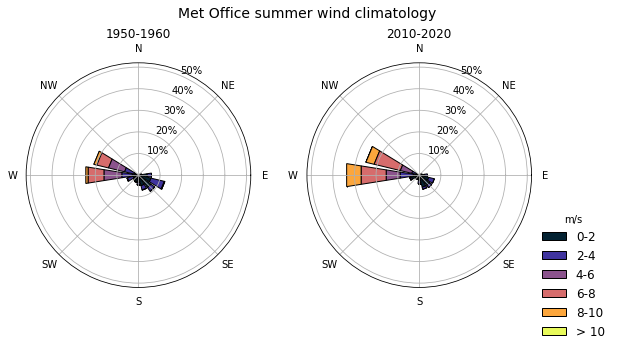

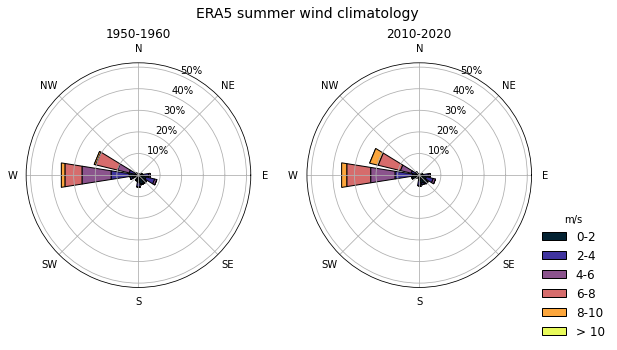

In [39]:
# three_roses([ERA_angle_fy, ERA_angle_su, ERA_angle_wi], [ERA_wspd_fy, ERA_wspd_su, ERA_wspd_wi],\
#             ['full year','summer','winter'], 'Southern Ocean south of -50, ERA5 wind climatology (1950-2020)', 0.65)

#three_roses([scen_1A_1950_angle_fy, scen_1A_1950_angle_su, scen_1A_1950_angle_wi], [scen_1A_1950_wspd_fy, scen_1A_1950_wspd_su, scen_1A_1950_wspd_wi],\
 #           ['full year','summer','winter'], 'Southern Ocean south of -50, scen_1A_19505 wind climatology (1950-2020)', 0.65)

two_roses([scen_1A_1950_angle_su, scen_1A_2010_angle_su], \
          [scen_1A_1950_wspd_su, scen_1A_2010_wspd_su],\
            ['1950-1960','2010-2020'], 'Met Office summer wind climatology', 'MO_summer_', 0.65)

two_roses([ERA5_1950_angle_su, ERA5_2010_angle_su], \
          [ERA5_1950_wspd_su, ERA5_2010_wspd_su],\
            ['1950-1960','2010-2020'], 'ERA5 summer wind climatology', 'ERA5_summer_', 0.65)


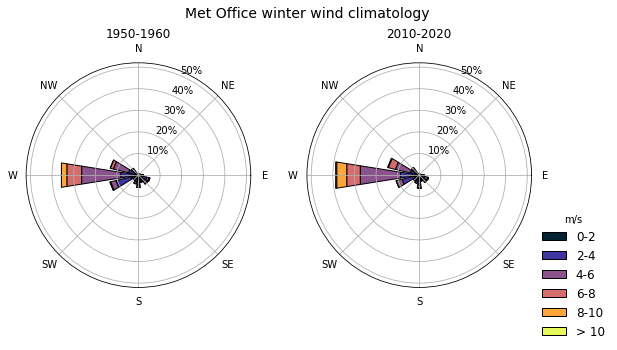

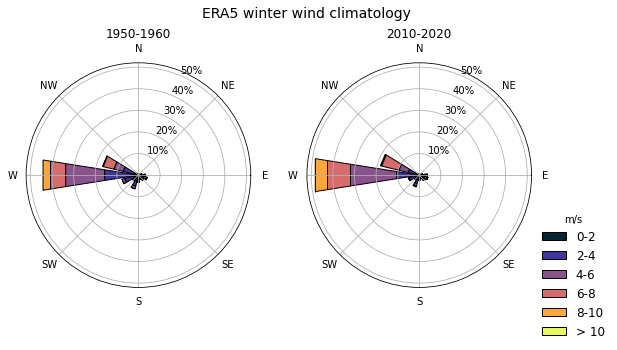

In [40]:
two_roses([scen_1A_1950_angle_wi, scen_1A_2010_angle_wi], \
          [scen_1A_1950_wspd_wi, scen_1A_2010_wspd_wi],\
            ['1950-1960','2010-2020'], 'Met Office winter wind climatology', 'MO_winter_', 0.65)

two_roses([ERA5_1950_angle_wi, ERA5_2010_angle_wi], \
          [ERA5_1950_wspd_wi, ERA5_2010_wspd_wi],\
            ['1950-1960','2010-2020'], 'ERA5 winter wind climatology', 'ERA5_winter_', 0.65)


## Climatology of ERA5 vs scenarios 1,2,3, past wind structure (mean 1950-2020)

In [41]:
ERA = nc.Dataset('./EXTRACT/ncs/ERA5_monthly_u_v_vel.nc')
u_vel_fy = np.nanmean(ERA['mean_uvel'][10:20,14,0:39,:], axis = 0)
v_vel_fy = np.nanmean(ERA['mean_vvel'][10:20,14,0:39,:], axis = 0)
u_vel_fy = u_vel_fy[tmask == 1]; u_vel_fy = np.ravel(u_vel_fy)
v_vel_fy = v_vel_fy[tmask == 1]; v_vel_fy = np.ravel(v_vel_fy)
u_vel_wi = np.nanmean(ERA['mean_uvel'][10:20,13,0:39,:], axis = 0)
v_vel_wi = np.nanmean(ERA['mean_vvel'][10:20,13,0:39,:], axis = 0)
u_vel_wi = u_vel_wi[tmask == 1]; u_vel_wi = np.ravel(u_vel_wi)
v_vel_wi = v_vel_wi[tmask == 1]; v_vel_wi = np.ravel(v_vel_wi)
u_vel_su = np.nanmean(ERA['mean_uvel'][10:20,12,0:39,:], axis = 0)
v_vel_su = np.nanmean(ERA['mean_vvel'][10:20,12,0:39,:], axis = 0)
u_vel_su = u_vel_su[tmask == 1]; u_vel_su = np.ravel(u_vel_su)
v_vel_su = v_vel_su[tmask == 1]; v_vel_su = np.ravel(v_vel_su)

ERA_angle_fy, ERA_wspd_fy = wspd_from_u_v(u_vel_fy,v_vel_fy)
ERA_angle_wi, ERA_wspd_wi = wspd_from_u_v(u_vel_wi,v_vel_wi)
ERA_angle_su, ERA_wspd_su = wspd_from_u_v(u_vel_su,v_vel_su)
print(ERA_wspd_su)


[3.6162305196384037 3.337703602569553 3.005182213595282 ...
 7.581146519845069 7.529586842420549 7.6317736690897835]


NameError: name 'scen_2A_angle_fy' is not defined

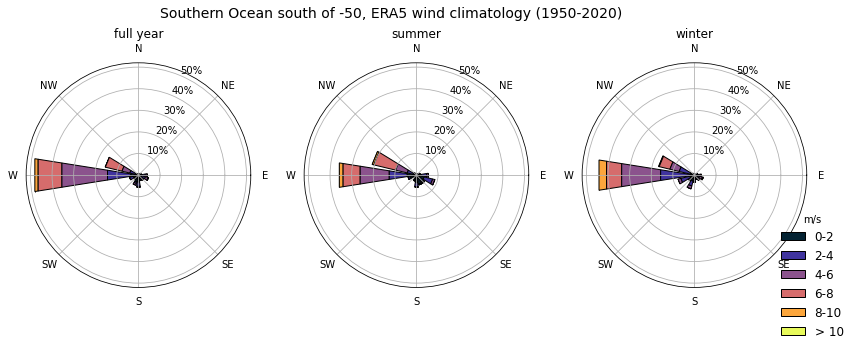

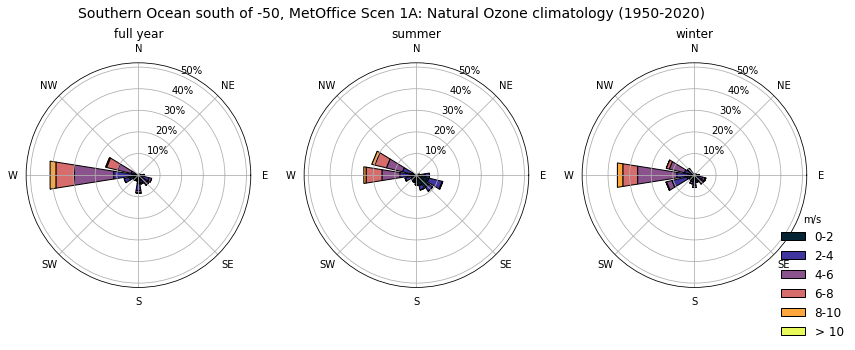

In [42]:


three_roses([ERA_angle_fy, ERA_angle_su, ERA_angle_wi], [ERA_wspd_fy, ERA_wspd_su, ERA_wspd_wi],\
            ['full year','summer','winter'], 'Southern Ocean south of -50, ERA5 wind climatology (1950-2020)', 0.65)
three_roses([scen_1A_angle_fy, scen_1A_angle_su, scen_1A_angle_wi], [scen_1A_wspd_fy, scen_1A_wspd_su, scen_1A_wspd_wi],\
            ['full year','summer','winter'], 'Southern Ocean south of -50, MetOffice Scen 1A: Natural Ozone climatology (1950-2020)', 0.65)
three_roses([scen_2A_angle_fy, scen_2A_angle_su, scen_2A_angle_wi], [scen_2A_wspd_fy, scen_2A_wspd_su, scen_2A_wspd_wi],\
            ['full year','summer','winter'], 'Southern Ocean south of -50, MetOffice Scen 2A: Ozone1950 climatology (1950-2020)', 0.65)
three_roses([scen_3A_angle_fy, scen_3A_angle_su, scen_3A_angle_wi], [scen_3A_wspd_fy, scen_3A_wspd_su, scen_3A_wspd_wi],\
            ['full year','summer','winter'], 'Southern Ocean south of -50, MetOffice Scen 3A: Ozone1990 climatology (1950-2020)', 0.65)

## Future summer conditions

In [ ]:
three_roses([scen_1A_angle_su, scen_2A_angle_su, scen_3A_angle_su], [scen_1A_wspd_su, scen_2A_wspd_su, scen_3A_wspd_su],\
            ['1A: NatlOzone','2A: Ozone1950','3A: Ozone1990'],\
            'Southern Ocean south of -50 summer wind climatology, 2080-2095, SSP 1-2.6, 3 ozone scenarios', 0.65)
three_roses([scen_1B_angle_su, scen_2B_angle_su, scen_3B_angle_su], [scen_1B_wspd_su, scen_2B_wspd_su, scen_3B_wspd_su],\
            ['1B: NatlOzone','2B: Ozone1950','3B: Ozone1990'],\
            'Southern Ocean south of -50 summer wind climatology, 2080-2095, SSP 3-7.0, 3 ozone scenarios', 0.65)
# three_roses([, scen_2A_angle_su, scen_2A_angle_wi], [scen_2A_wspd_fy, scen_2A_wspd_su, scen_2A_wspd_wi],\
#             ['full year','summer','winter'], 'Southern Ocean south of -50, MetOffice Scen 2A: Ozone1950 climatology (2080-2095)', 0.65)
# three_roses([, scen_3A_angle_su, scen_3A_angle_wi], [scen_3A_wspd_fy, scen_3A_wspd_su, scen_3A_wspd_wi],\
#             ['full year','summer','winter'], 'Southern Ocean south of -50, MetOffice Scen 3A: Ozone1990 climatology (2080-2095)', 0.65)

## Future winter conditions


In [ ]:
three_roses([scen_1A_angle_wi, scen_2A_angle_wi, scen_3A_angle_wi], [scen_1A_wspd_wi, scen_2A_wspd_wi, scen_3A_wspd_wi],\
            ['1A: NatlOzone','2A: Ozone1950','3A: Ozone1990'],\
            'Southern Ocean south of -50 winter wind climatology, 2080-2095, SSP 1-2.6, 3 ozone scenarios', 0.65)
three_roses([scen_1B_angle_wi, scen_2B_angle_wi, scen_3B_angle_wi], [scen_1B_wspd_wi, scen_2B_wspd_wi, scen_3B_wspd_wi],\
            ['1B: NatlOzone','2B: Ozone1950','3B: Ozone1990'],\
            'Southern Ocean south of -50 winter wind climatology, 2080-2095, SSP 3-7.0, 3 ozone scenarios', 0.65)
# three_roses([, scen_2A_angle_wi, scen_2A_angle_wi], [scen_2A_wspd_fy, scen_2A_wspd_wi, scen_2A_wspd_wi],\
#             ['full year','winter','winter'], 'Southern Ocean south of -50, MetOffice Scen 2A: Ozone1950 climatology (2080-2095)', 0.65)
# three_roses([, scen_3A_angle_wi, scen_3A_angle_wi], [scen_3A_wspd_fy, scen_3A_wspd_wi, scen_3A_wspd_wi],\
#             ['full year','winter','winter'], 'Southern Ocean south of -50, MetOffice Scen 3A: Ozone1990 climatology (2080-2095)', 0.65)

In [ ]:
print('rendered')
